# Getting started

In [19]:
import blendz

## Quickstart

The simplest way to use ``blendz`` is to create a ``Photoz`` object.

In [2]:
from os.path import join

pz = blendz.Photoz(data_path=join(blendz.RESOURCE_PATH, 'data/bpz/UDFzspec.cat'),
                   mag_cols = [22, 24, 26, 28, 30, 31], 
                   sigma_cols = [23, 25, 27, 29, 31, 33], 
                   #####################################################################
                   #Settings in here shouldn't be necessary - remove them
                   filter_file_extension='.res',
                   spec_z_col=7,
                   #####################################################################
                   ref_band = 2, ref_mag_lo = 20, ref_mag_hi = 32,
                   zero_point_errors = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
                   filters=['HST_ACS_WFC_F435W', 'HST_ACS_WFC_F606W', 'HST_ACS_WFC_F775W', \
                            'HST_ACS_WFC_F850LP', 'nic3_f110w', 'nic3_f160w'])

/home/dan/anaconda2/lib/python2.7/site-packages/blendz/model/bpz.py:65: RuntimeWarning: divide by zero encountered in log
  first = (self.prior_params['alpha_t'][template_type] * np.log(redshift))


Sample from the single component posterior:

In [3]:
pz.sample(1, resample=10000)

[Gal: 57/57, Comp: 1/1, Itr: 2000] : 100%|██████████| 57/57 [11:36<00:00,  9.76s/it]


Plot the result:

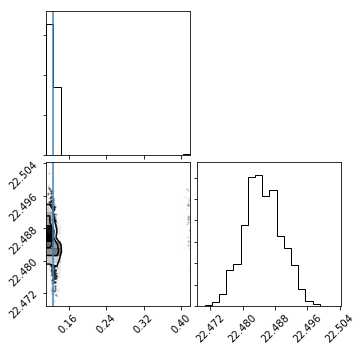

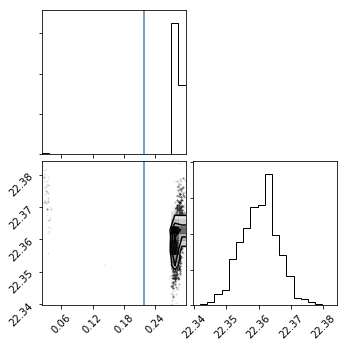

In [20]:
import corner

for g in range(2):#range(pz.num_galaxies):
    corner.corner(pz.reweighted_samples[g][1], truths=[pz.photometry[g].spec_redshift, None])